<a href="https://colab.research.google.com/github/Sushi-DS/customer-churn-Analysis/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

sns.set_style('whitegrid')
%matplotlib inline

import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Import libariaries for XGBoosting

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

from imblearn.over_sampling import SMOTE

# Import random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Load Dataset

telecom_df = pd.read_csv('/content/Telecom Churn.csv')
telecom_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [63]:
# Dataset First Look
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [64]:
# Dataset Rows & Columns count
telecom_df.shape

(3333, 20)

In [65]:
# Dataset Info
telecom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [66]:
# Dataset Duplicate Value Count
telecom_df.duplicated().sum()

0

In [67]:

# Missing Values/Null Values Count
telecom_df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


<Axes: >

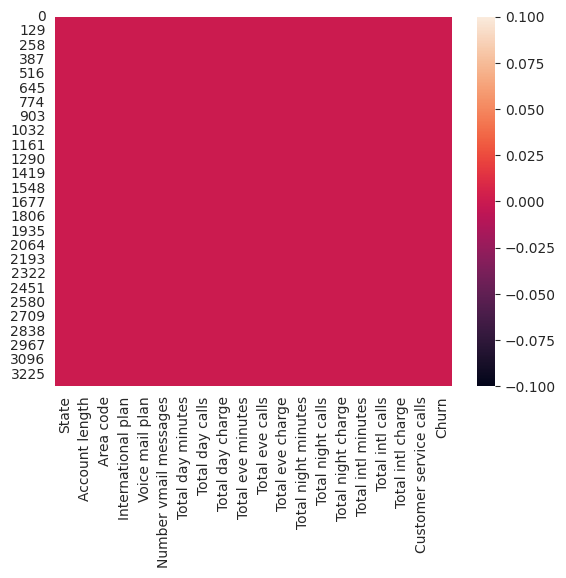

In [68]:
# Visualizing the missing values
sns.heatmap(telecom_df.isnull())

In [69]:
# Dataset Columns
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [70]:

# Dataset Describe
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [71]:
# Check Unique Values for each variable.
for i in telecom_df.columns:
  print("No. of unique values in ",i,"is", telecom_df[i].nunique())

No. of unique values in  State is 51
No. of unique values in  Account length is 212
No. of unique values in  Area code is 3
No. of unique values in  International plan is 2
No. of unique values in  Voice mail plan is 2
No. of unique values in  Number vmail messages is 46
No. of unique values in  Total day minutes is 1667
No. of unique values in  Total day calls is 119
No. of unique values in  Total day charge is 1667
No. of unique values in  Total eve minutes is 1611
No. of unique values in  Total eve calls is 123
No. of unique values in  Total eve charge is 1440
No. of unique values in  Total night minutes is 1591
No. of unique values in  Total night calls is 120
No. of unique values in  Total night charge is 933
No. of unique values in  Total intl minutes is 162
No. of unique values in  Total intl calls is 21
No. of unique values in  Total intl charge is 162
No. of unique values in  Customer service calls is 10
No. of unique values in  Churn is 2


# Data Wrangling Code

In [72]:
# Write your code to make your dataset analysis ready.
print("No. of customers Churning :",telecom_df[telecom_df['Churn']==True].Churn.count()) # Total No of Customers Churning

# Variable Assigning to churned data
churn_df = telecom_df[telecom_df['Churn']==True]

# Total No of Unique Area Code
print("No of Unique Area Code :", telecom_df['Area code'].nunique())

# Customers On which Internaltion plan is activated
print("No of customer with international plan activated :", telecom_df[telecom_df['International plan']=='Yes']['International plan'].count())

# Customers On which Voice mail plan is activated
print("No of customer with Voice mail plan activated :", telecom_df[telecom_df['Voice mail plan']=='Yes']['Voice mail plan'].count())

churn_df

No. of customers Churning : 483
No of Unique Area Code : 3
No of customer with international plan activated : 323
No of customer with Voice mail plan activated : 922


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [73]:
# % of total customers churning
print("Total no. of customers :", telecom_df.Churn.count())
perc_churn = (churn_df.Churn.count()/telecom_df.Churn.count())*100
print(f"Percentage of customer churning : {round(perc_churn,2)}%")

Total no. of customers : 3333
Percentage of customer churning : 14.49%


In [74]:

#Statewise customer churning
state_cust_churn = churn_df.groupby(['State'])['Churn'].value_counts().reset_index(name='Churn_customer')
print(state_cust_churn.sum())
state_cust_churn

State             AKALARAZCACOCTDCDEFLGAHIIAIDILINKSKYLAMAMDMEMI...
Churn                                                            51
Churn_customer                                                  483
dtype: object


,State,Churn,Churn_customer
0,AK,True,3
1,AL,True,8
2,AR,True,11
3,AZ,True,4
4,CA,True,9
5,CO,True,9
6,CT,True,12
7,DC,True,5
8,DE,True,9
9,FL,True,8


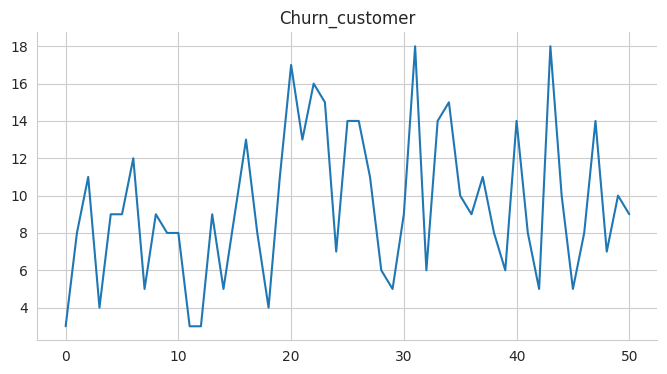

In [75]:
from matplotlib import pyplot as plt
state_cust_churn['Churn_customer'].plot(kind='line', figsize=(8, 4), title='Churn_customer')
plt.gca().spines[['top', 'right']].set_visible(False)

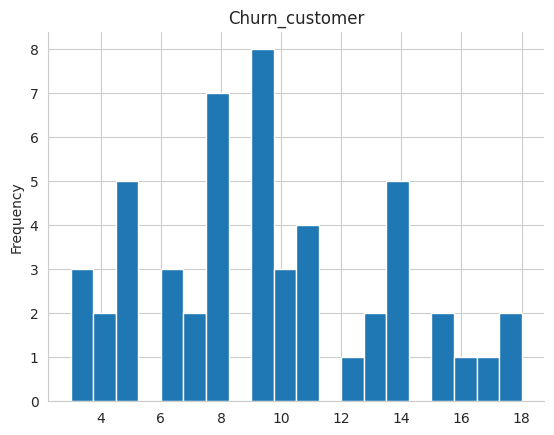

In [76]:
from matplotlib import pyplot as plt
state_cust_churn['Churn_customer'].plot(kind='hist', bins=20, title='Churn_customer')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [77]:

# Account length wise churn data
acc_len_churn = churn_df.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
print(acc_len_churn.sum())
acc_len_churn

Account length    17028
Churn               164
values              483
dtype: int64


,Account length,Churn,values
0,1,True,1
1,2,True,1
2,12,True,1
3,13,True,1
4,16,True,1
...,...,...,...
159,208,True,1
160,209,True,1
161,212,True,1
162,224,True,1


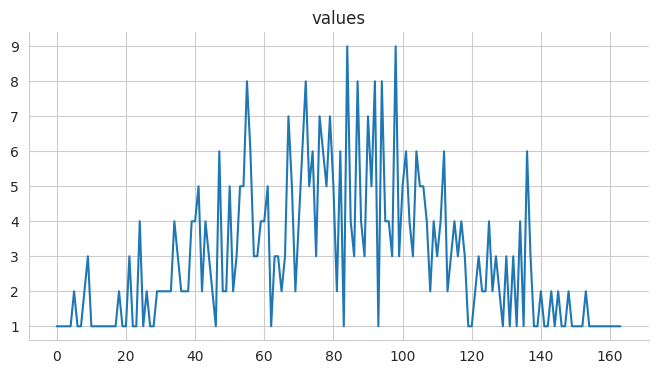

In [78]:
from matplotlib import pyplot as plt
acc_len_churn['values'].plot(kind='line', figsize=(8, 4), title='values')
plt.gca().spines[['top', 'right']].set_visible(False)

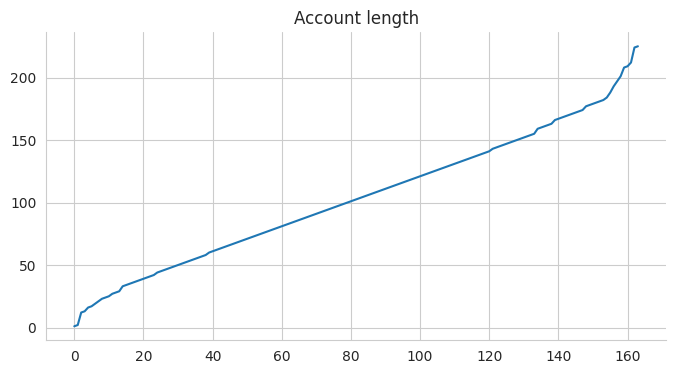

In [79]:
from matplotlib import pyplot as plt
acc_len_churn['Account length'].plot(kind='line', figsize=(8, 4), title='Account length')
plt.gca().spines[['top', 'right']].set_visible(False)

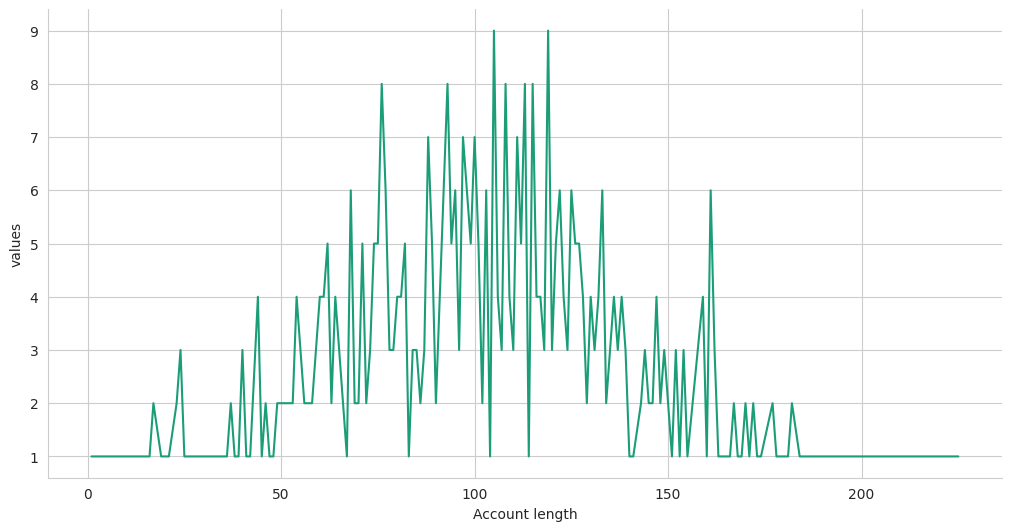

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Account length']
  ys = series['values']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = acc_len_churn.sort_values('Account length', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Account length')
_ = plt.ylabel('values')

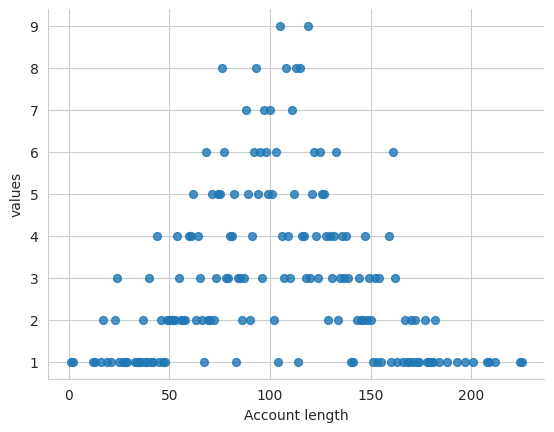

In [81]:
from matplotlib import pyplot as plt
acc_len_churn.plot(kind='scatter', x='Account length', y='values', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

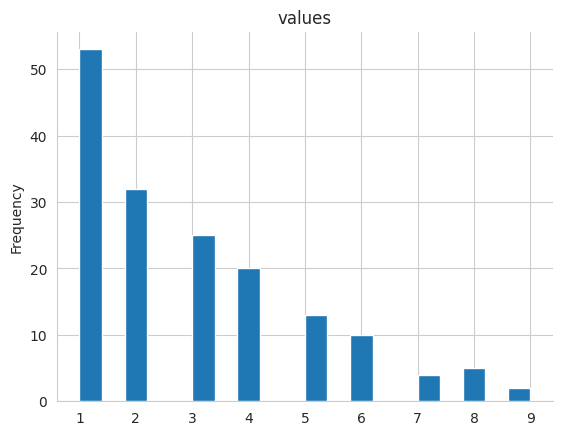

In [82]:
from matplotlib import pyplot as plt
acc_len_churn['values'].plot(kind='hist', bins=20, title='values')
plt.gca().spines[['top', 'right',]].set_visible(False)

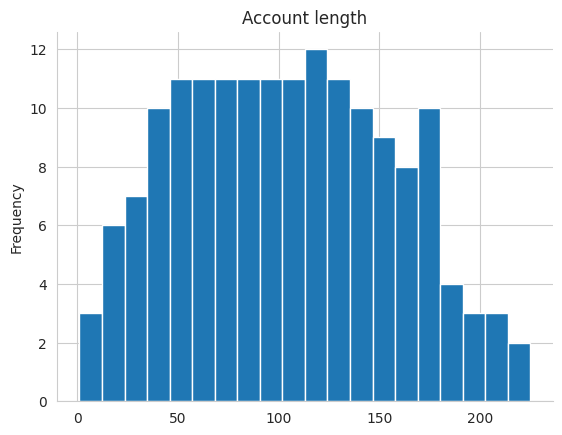

In [83]:
from matplotlib import pyplot as plt
acc_len_churn['Account length'].plot(kind='hist', bins=20, title='Account length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [84]:

# Area Code wise churn Percentage
Area_code_churn_perc = (telecom_df.groupby(['Area code'])['Churn'].mean()*100).reset_index()
Area_code_churn_perc

,Area code,Churn
0,408,14.558473
1,415,14.259819
2,510,14.880952


In [85]:
# Area code wise Churn Count
Area_code_churn_count = churn_df.groupby(['Area code'])['Churn'].value_counts().reset_index(name='Counts')
Area_code_churn_count

,Area code,Churn,Counts
0,408,True,122
1,415,True,236
2,510,True,125


In [86]:

#Poor Connectivity by intersection of state by area code
Area_state_churn = churn_df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn


,Area code,Unique state
0,408,"[CO, AZ, MD, NY, IN, MS, VT, VA, KS, SD, RI, O..."
1,415,"[IN, NY, ID, WY, DC, NJ, LA, NV, MS, OH, AK, M..."
2,510,"[TX, ME, MS, FL, MN, OK, SD, WI, DE, KS, OH, W..."


In [87]:
# Assigning the list of state of each area
Area_408_state_churn = Area_state_churn.loc[0,'Unique state']
Area_415_state_churn = Area_state_churn.loc[1,'Unique state']
Area_510_state_churn = Area_state_churn.loc[2,'Unique state']

inter_1= set(Area_408_state_churn).intersection(set(Area_415_state_churn))
poor_connectivity_states = set(inter_1).intersection(set(Area_510_state_churn))

print(f"Intersection by different areas code of churning gives {len(poor_connectivity_states)} poor connectivity states")
print("Try to short down the list of state by different dataset to generate more precise poor connectivity states")



Intersection by different areas code of churning gives 38 poor connectivity states
Try to short down the list of state by different dataset to generate more precise poor connectivity states


In [88]:
# Percentage of Customers with and without international Plan churning to other networks
intl_plan_churn = (telecom_df.groupby(['International plan'])['Churn'].mean()*100).reset_index(name='Churn %')
print(intl_plan_churn)

# Total number of Customers churning with international plan
churn_intl_yes = churn_df[churn_df['International plan']=='Yes']
print(f"No of Customers churning having International plan is {churn_intl_yes['International plan'].value_counts()[0]}")

# Total number of Customers churning without international plan
churn_intl_no = churn_df[churn_df['International plan']=='No']
print(f"No of Customers churning without having International plan is {churn_intl_no['International plan'].value_counts()[0]}")



  International plan    Churn %
0                 No  11.495017
1                Yes  42.414861
No of Customers churning having International plan is 137
No of Customers churning without having International plan is 346


<ipython-input-88-1fcfc8aa1874>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning having International plan is {churn_intl_yes['International plan'].value_counts()[0]}")
<ipython-input-88-1fcfc8aa1874>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning without having International plan is {churn_intl_no['International plan'].value_counts()[0]}")


In [89]:
# Percentage of People with and without Voice mail Plan churning to other networks
vmail_plan_churn = (telecom_df.groupby(['Voice mail plan'])['Churn'].mean()*100).reset_index(name='Churn %')
print(vmail_plan_churn)

# Total number of people churning with vmail plan
churn_vmail_yes = churn_df[churn_df['Voice mail plan']=='Yes']
print(f"No of Customers churning having vmail plan is {churn_vmail_yes['Voice mail plan'].value_counts()[0]}")

# Total number of people churning without vmail plan
churn_vmail_no = churn_df[churn_df['Voice mail plan']=='No']
print(f"No of Customers churning not having vmail plan is {churn_vmail_no['Voice mail plan'].value_counts()[0]}")



  Voice mail plan    Churn %
0              No  16.715056
1             Yes   8.676790
No of Customers churning having vmail plan is 80
No of Customers churning not having vmail plan is 403


<ipython-input-89-8ca254ca46c3>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning having vmail plan is {churn_vmail_yes['Voice mail plan'].value_counts()[0]}")
<ipython-input-89-8ca254ca46c3>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning not having vmail plan is {churn_vmail_no['Voice mail plan'].value_counts()[0]}")


In [90]:
# Customers churning having intl plan and vmail plan
intl_vmail_yes = churn_df[(churn_df['International plan'] == 'Yes') & (churn_df['Voice mail plan'] == 'Yes')]
if len(intl_vmail_yes) > 0:
    print(f"No of Customers churning having intl and vmail plan are {intl_vmail_yes['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with both intl plan and vmail plan.")

# Customers churning having no intl plan and no vmail plan
intl_vmail_no = churn_df[(churn_df['International plan'] == 'No') & (churn_df['Voice mail plan'] == 'No')]
if len(intl_vmail_no) > 0:
    print(f"No of Customers churning having no intl plan and no vmail plan are {intl_vmail_no['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with neither intl plan nor vmail plan.")

# Customers churning having intl plan but no vmail plan
intl_yes_vmail_no = churn_df[(churn_df['International plan'] == 'Yes') & (churn_df['Voice mail plan'] == 'No')]
if len(intl_yes_vmail_no) > 0:
    print(f"No of Customers churning having intl plan but no vmail plan are {intl_yes_vmail_no['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with intl plan but no vmail plan.")

# Customers churning having no intl plan but vmail plan
intl_no_vmail_yes = churn_df[(churn_df['International plan'] == 'No') & (churn_df['Voice mail plan'] == 'Yes')]
if len(intl_no_vmail_yes) > 0:
    print(f"No of Customers churning having no intl plan but vmail plan are {intl_no_vmail_yes['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with no intl plan but vmail plan.")


No of Customers churning having intl and vmail plan are 0
No of Customers churning having no intl plan and no vmail plan are 0
No of Customers churning having intl plan but no vmail plan are 0
No of Customers churning having no intl plan but vmail plan are 0


<ipython-input-90-62c4d0e49dbf>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning having intl and vmail plan are {intl_vmail_yes['Churn'].value_counts().get(1, 0)}")
<ipython-input-90-62c4d0e49dbf>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No of Customers churning having no intl plan and no vmail plan are {intl_vmail_no['Churn'].value_counts().get(1, 0)}")
<ipython-input-90-62c4d0e49dbf>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). 

In [91]:
def conv_data_type (ldf):
    #Convert columns with Yes/No to 1/0
    ldf['International plan'] = ldf['International plan'].map({'Yes':1, 'No':0})
    ldf['Voice mail plan'] = ldf['Voice mail plan'].map({'Yes':1, 'No':0})
    ldf['Churn'] = ldf['Churn'].astype(int)
    #return ldf

In [92]:
conv_data_type(telecom_df)

In [93]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [94]:
# Option 2: Label encode the 'State' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
telecom_df['State'] = le.fit_transform(telecom_df['State'])


In [95]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

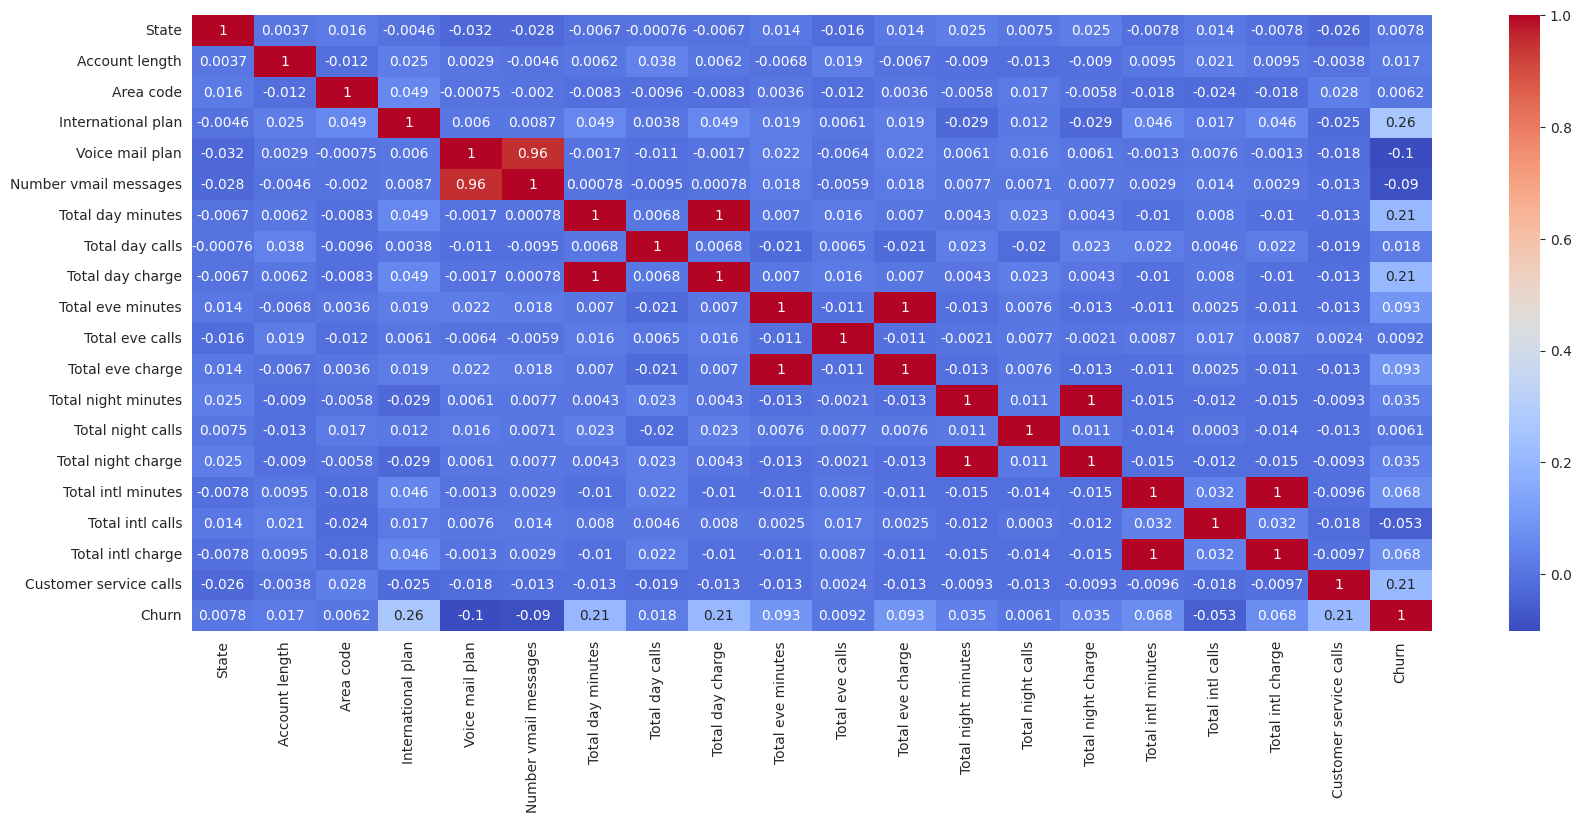

In [96]:
plt.figure(figsize = (20,8))
sns.heatmap(telecom_df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [97]:
## Get the continous variables into the python list num_var
num_var = list(telecom_df.select_dtypes(exclude = ['object', 'bool']).columns)
unwanted_var = ['Churn', 'International plan', 'Voice mail plan', 'Area Code']
num_var = [var for var in num_var if var not in unwanted_var]
num_var

['State',
 'Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

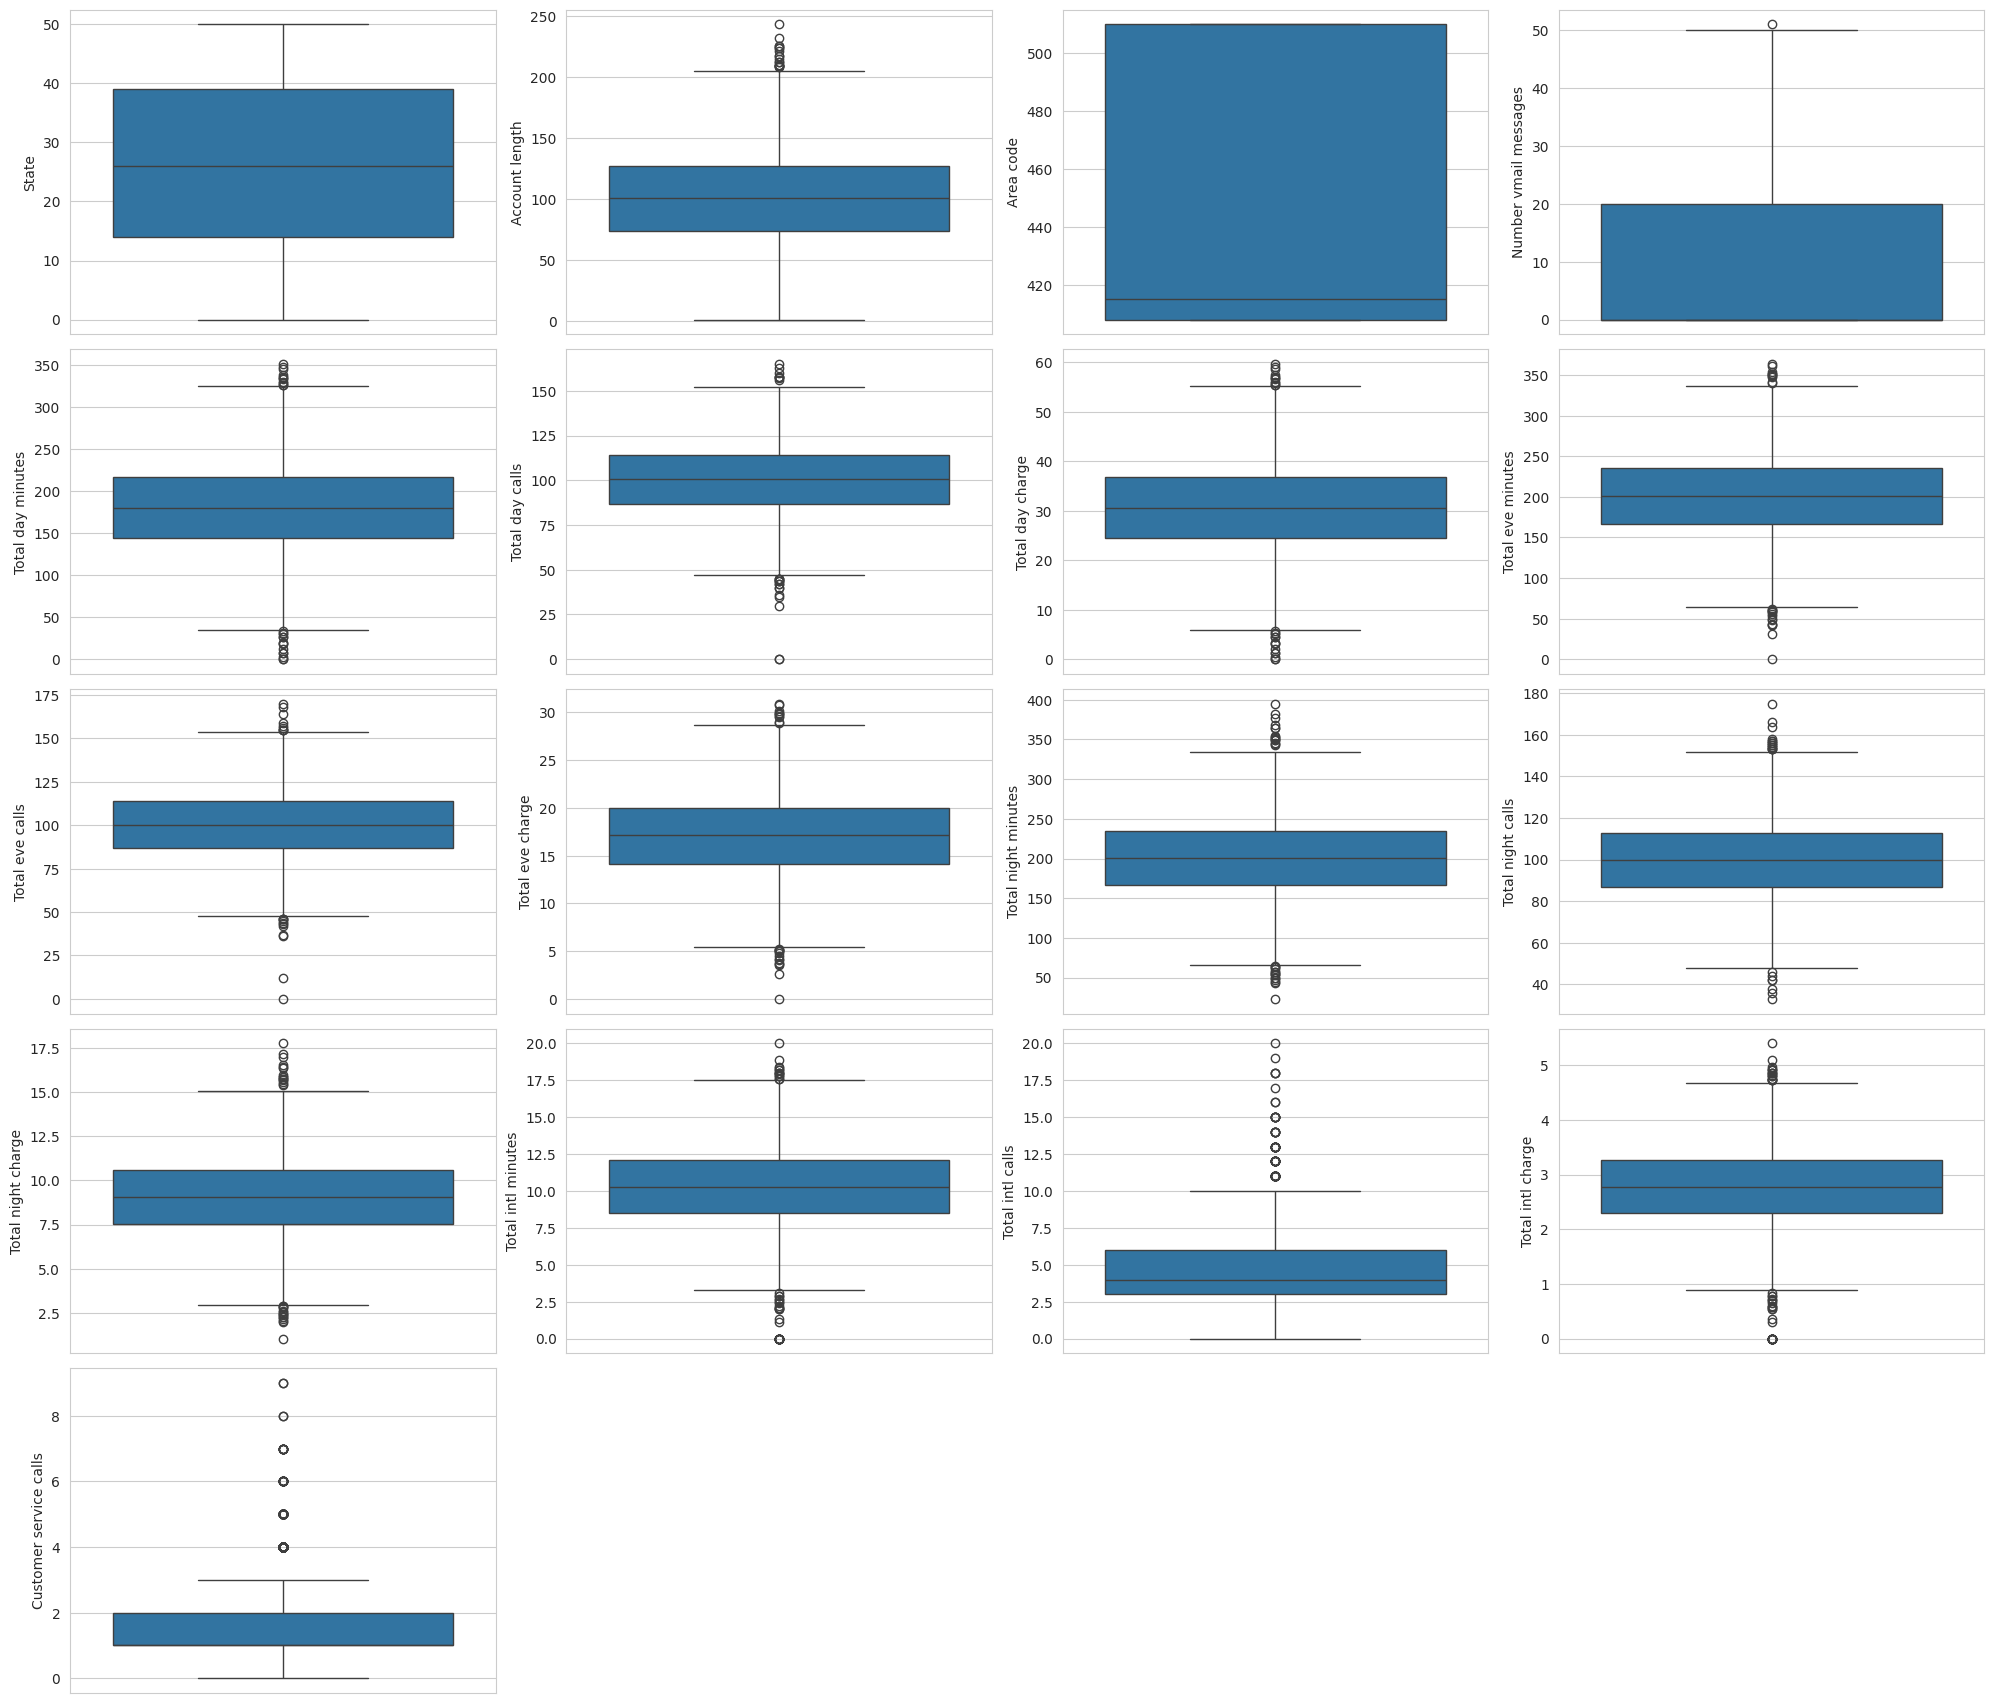

In [98]:
# Loop through each continuous variable and plot the Boxplot
def plot_boxplots():
    plt.figure(figsize=(20, 170))
    l_row = 50
    l_pos = 1
    for col in num_var:
        plt.subplot(l_row, 4, l_pos)
        sns.boxplot(y=col, data=telecom_df)
        l_pos += 1
    plt.tight_layout()
    plt.show()

plot_boxplots()

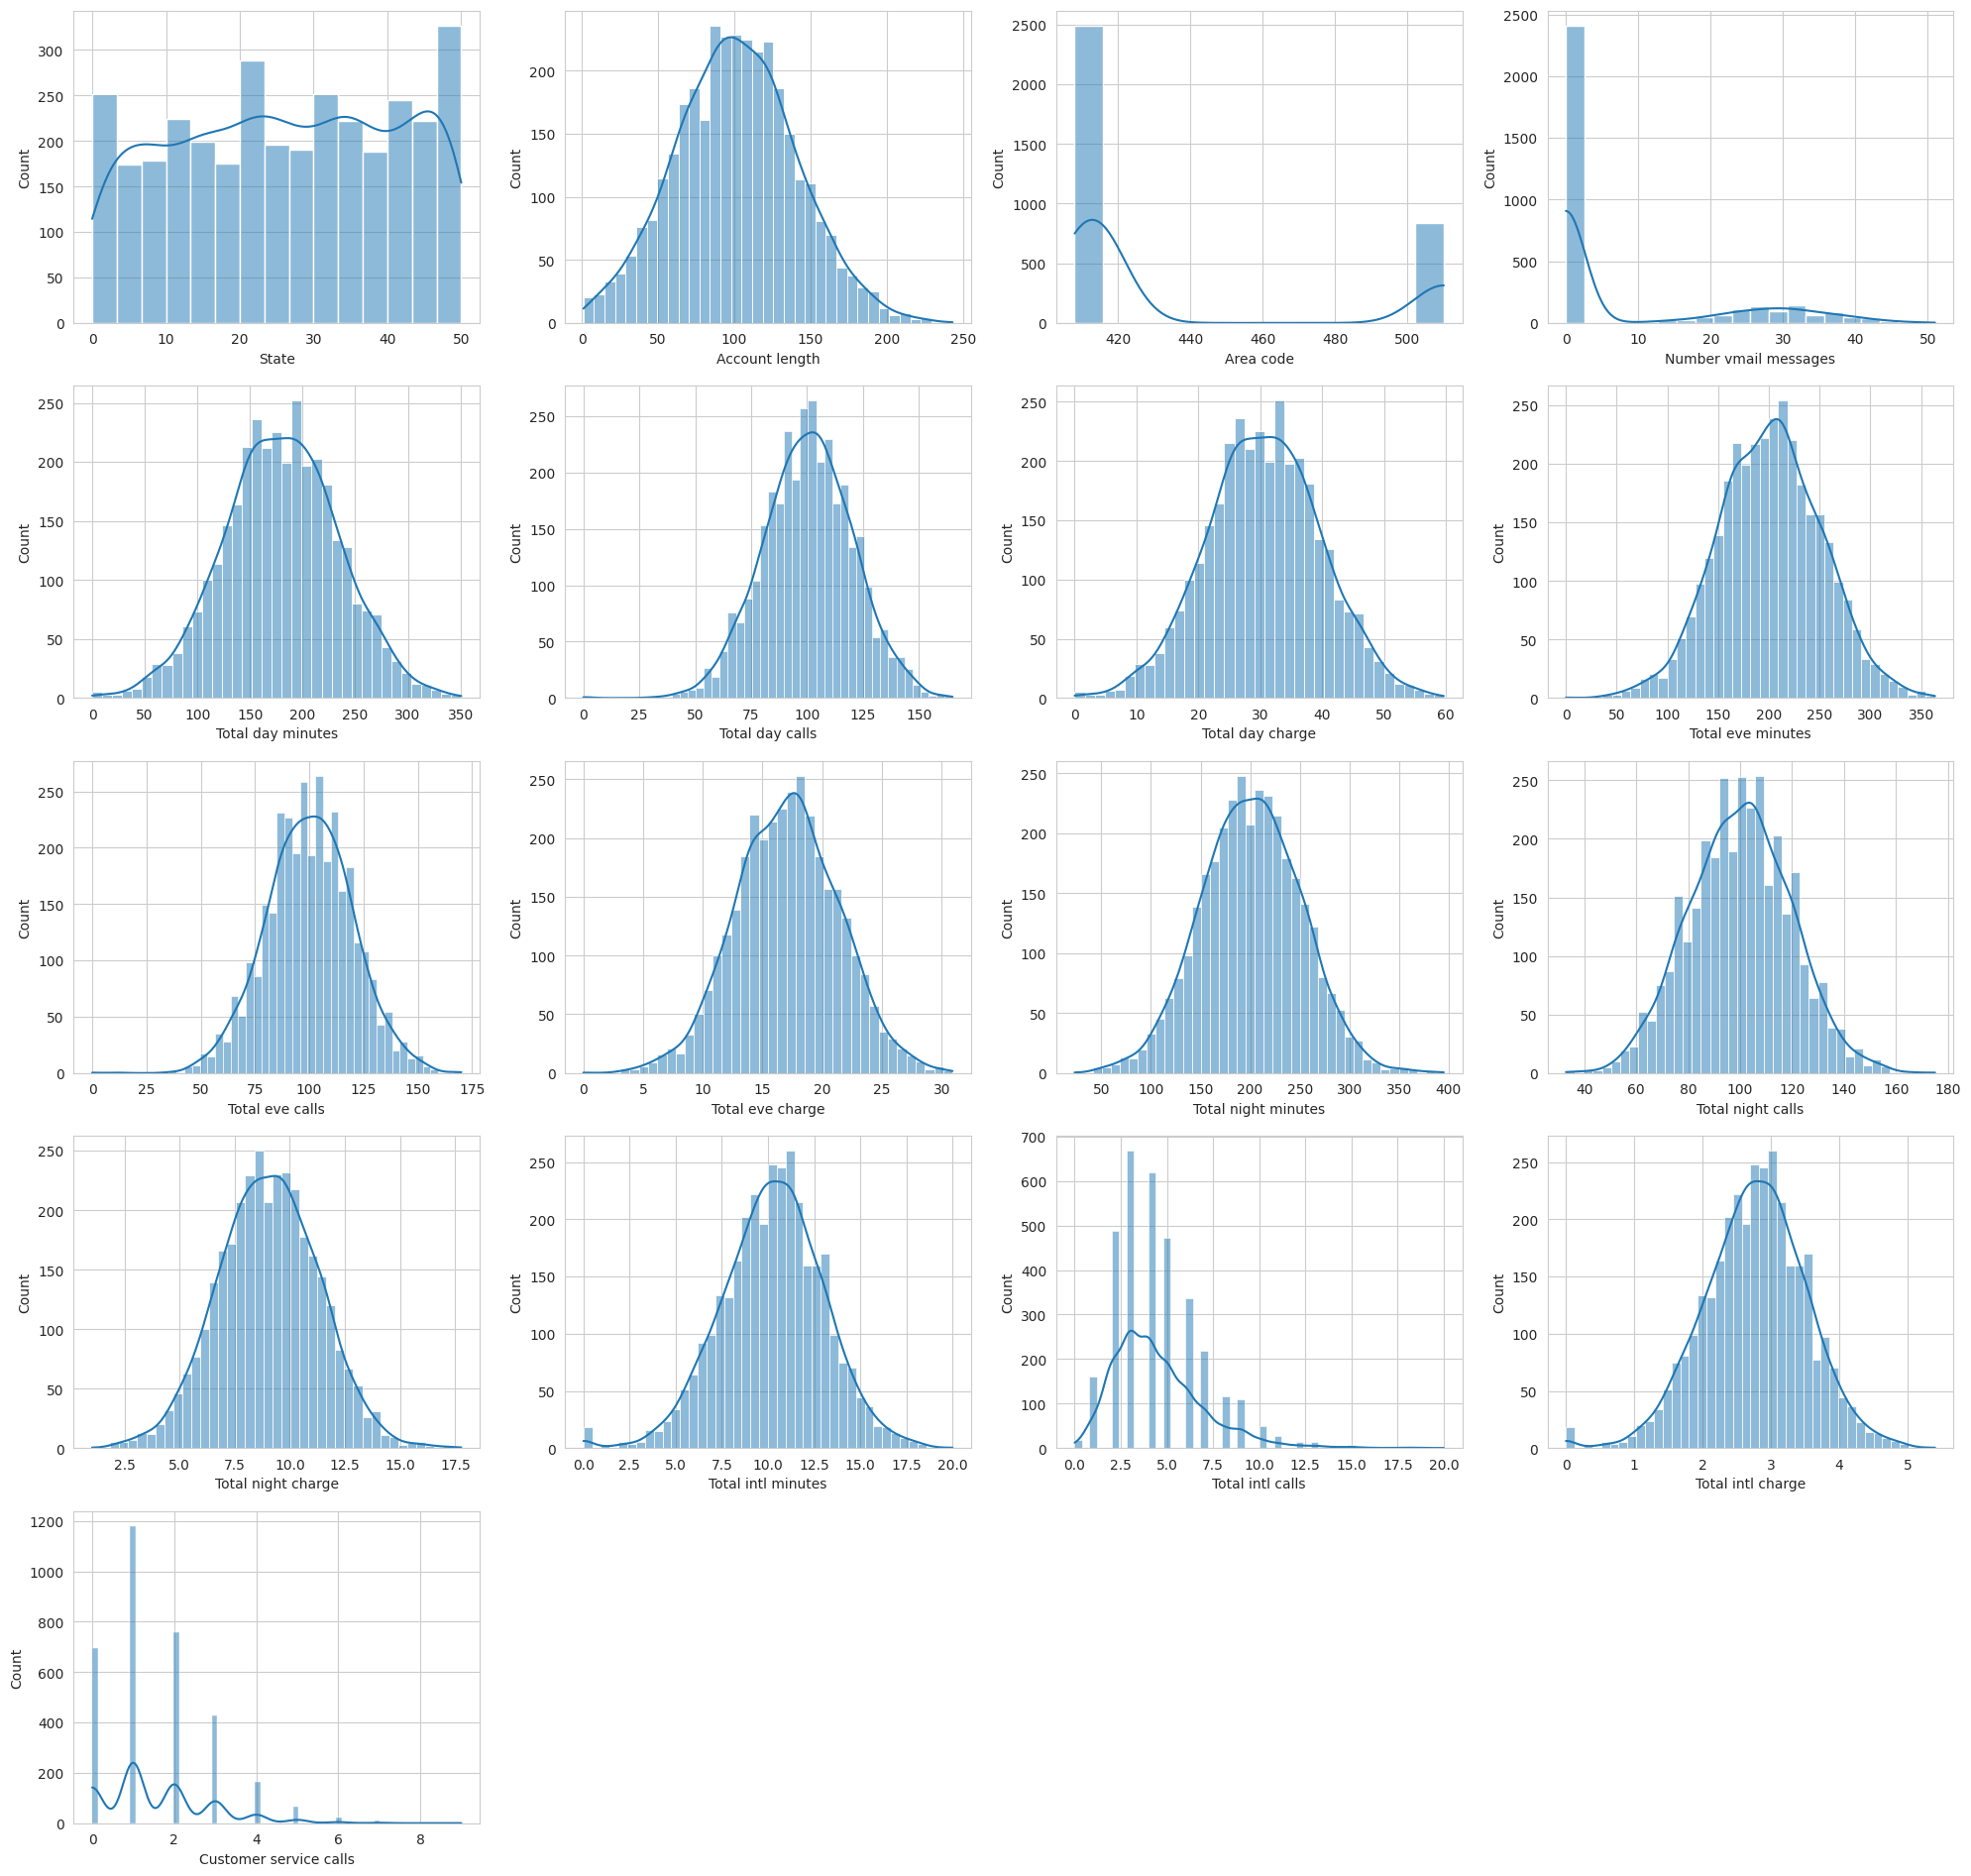

In [99]:
def check_dist():
    plt.figure(figsize=(20, 170))
    l_row = 45
    l_pos = 1
    for col in num_var:
        plt.subplot(l_row, 4, l_pos)
        sns.histplot(telecom_df[col], kde=True)  # Replacing sns.displot with sns.histplot
        l_pos += 1
    plt.tight_layout()
    plt.show()

check_dist()

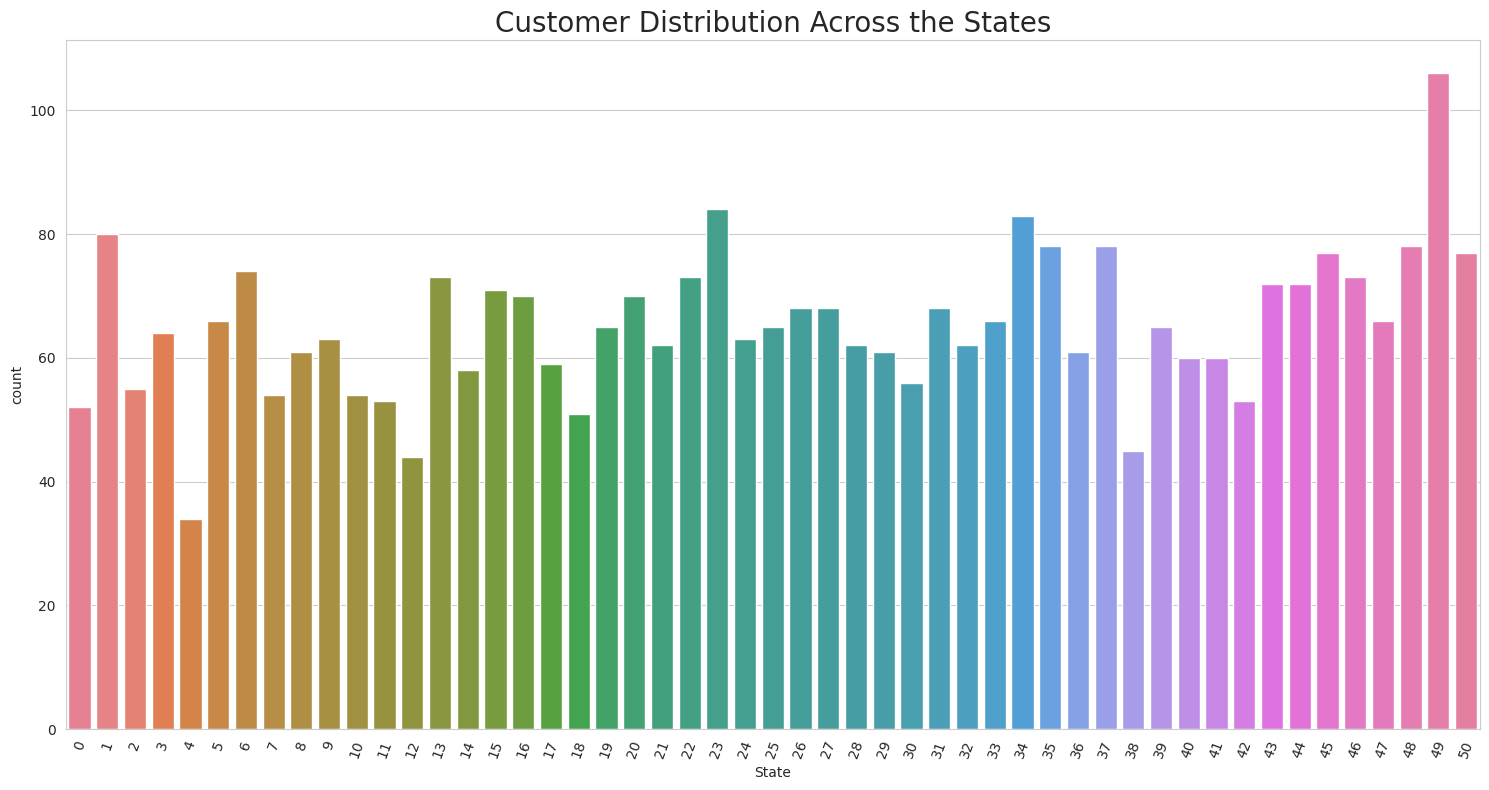

In [100]:
# Define a color palette for each state
colors = sns.color_palette('husl', len(telecom_df['State'].unique()))

plt.figure(figsize=(15, 8))
sns.countplot(x='State', data=telecom_df, hue='State', palette=colors, dodge=False)
plt.xticks(rotation=70)
plt.title('Customer Distribution Across the States', fontsize=20)
plt.legend([], [], frameon=False)  # Hide the legend
plt.tight_layout()
plt.show()

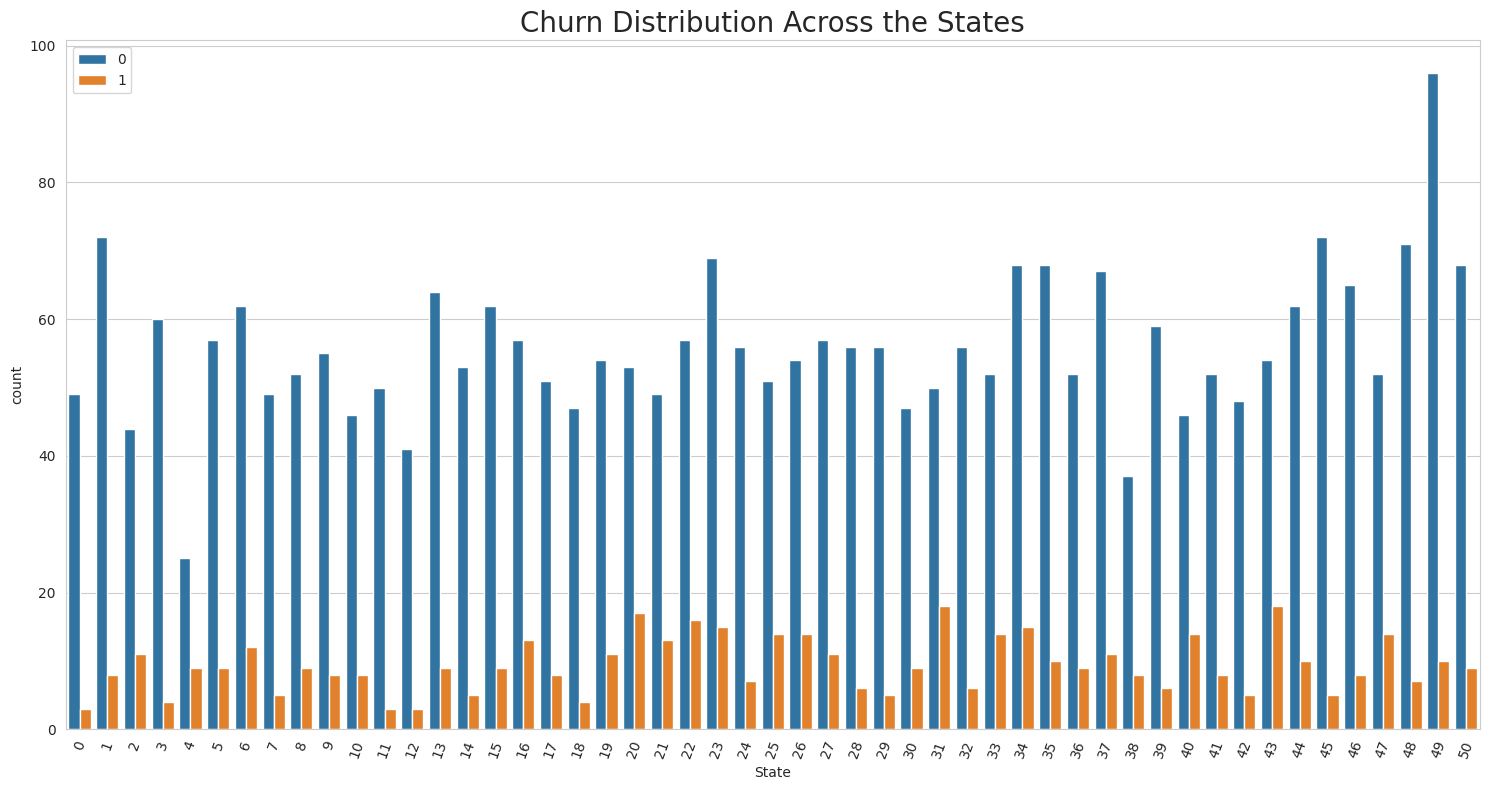

In [101]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'State', data = telecom_df, hue = 'Churn')
plt.xticks(rotation = 70)
plt.title('Churn Distribution Across the States', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show()

Feature Engineering

In [102]:
def perf_feature_engg(ldf):
    #Let's create two new feaures Total minutes, Total calls nd Total charge
    ldf['Total calls'] = ldf['Total day calls'] + ldf['Total eve calls'] + ldf['Total night calls'] + ldf['Total intl calls']
    ldf['Total minutes'] = ldf['Total day minutes'] + ldf['Total eve minutes'] + ldf['Total night minutes'] + ldf['Total intl minutes']
    ldf['Total charge'] = ldf['Total day charge'] + ldf['Total eve charge'] + ldf['Total night charge']+ ldf['Total intl charge']

In [103]:
perf_feature_engg(telecom_df)

In [104]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total minutes,Total charge
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,303,717.2,75.56
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,332,625.2,59.24
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,333,539.4,62.29
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,255,564.8,66.80
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,359,512.0,52.09


In [105]:
#Statistical overview
telecom_df[['Total calls', 'Total minutes', 'Total charge']].describe()

,Total calls,Total minutes,Total charge
count,3333.000000,3333.000000,3333.000000
mean,305.137114,591.864776,59.449754
std,34.448164,89.954251,10.502261
min,191.000000,284.300000,22.930000
25%,282.000000,531.500000,52.380000
50%,305.000000,593.600000,59.470000
75%,328.000000,652.400000,66.480000
max,416.000000,885.000000,96.150000


# Rescale/Normalize the features

In [106]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total minutes,Total charge
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,303,717.2,75.56
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,332,625.2,59.24
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,333,539.4,62.29
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,255,564.8,66.80
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,359,512.0,52.09


In [107]:
# Get the variables to be normalized into a list
col_to_norm = ['Account length', 'Number vmail messages', 'Total intl calls', 'Total intl minutes', 'Total intl charge', 'Customer service calls', 'Total calls', 'Total minutes', 'Total charge']

In [108]:
# Intantiate the scaler
scaler = StandardScaler()

In [109]:
# perforom the scaling on the required variables
telecom_df[col_to_norm] = scaler.fit_transform(telecom_df[col_to_norm])

In [110]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total minutes,Total charge
0,16,0.676489,415,0,1,1.234883,265.1,110,45.07,197.4,...,91,11.01,-0.085008,-0.601195,-0.085690,-0.427932,0,-0.062048,1.393531,1.534209
1,35,0.149065,415,0,1,1.307948,161.6,123,27.47,195.5,...,103,11.45,1.240482,-0.601195,1.241169,-0.427932,0,0.779923,0.370635,-0.019975
2,31,0.902529,415,0,0,-0.591760,243.4,114,41.38,121.2,...,104,7.32,0.703121,0.211534,0.697156,-1.188218,0,0.808957,-0.583326,0.270482
3,35,-0.428590,408,1,0,-0.591760,299.4,71,50.90,61.9,...,89,8.86,-1.303026,1.024263,-1.306401,0.332354,0,-1.455655,-0.300918,0.699978
4,36,-0.654629,415,1,0,-0.591760,166.7,113,28.34,148.3,...,121,8.41,-0.049184,-0.601195,-0.045885,1.092641,0,1.563827,-0.887971,-0.700883


In [111]:
# Let's check the churn rate
print('Churn Rate is {}'.format(round(telecom_df.Churn.sum()/len(telecom_df.index)*100,2)))

Churn Rate is 14.49


In [112]:
#Let's find out the high value customers (Total Chare > 70 percentile)
pcet_70 = np.percentile(telecom_df['Total charge'], 70)
print('70th Percentile of charge amount {}'.format(pcet_70))

70th Percentile of charge amount 0.5159897619650003


In [113]:
# No of high value customers
high_value_cust = telecom_df.loc[telecom_df['Total charge'] >= pcet_70]

In [114]:
print('There are {} high value customers'.format(high_value_cust.shape[0]))

There are 1000 high value customers


In [115]:
classes = round(telecom_df['Churn'].value_counts()/len(telecom_df.index)*100,2)
non_churn_share = classes[0]
churn_share = classes[1]

In [116]:
print('Non Churn Share : {}'.format(non_churn_share))
print('Churn Share : {}'.format(churn_share))

Non Churn Share : 85.51
Churn Share : 14.49


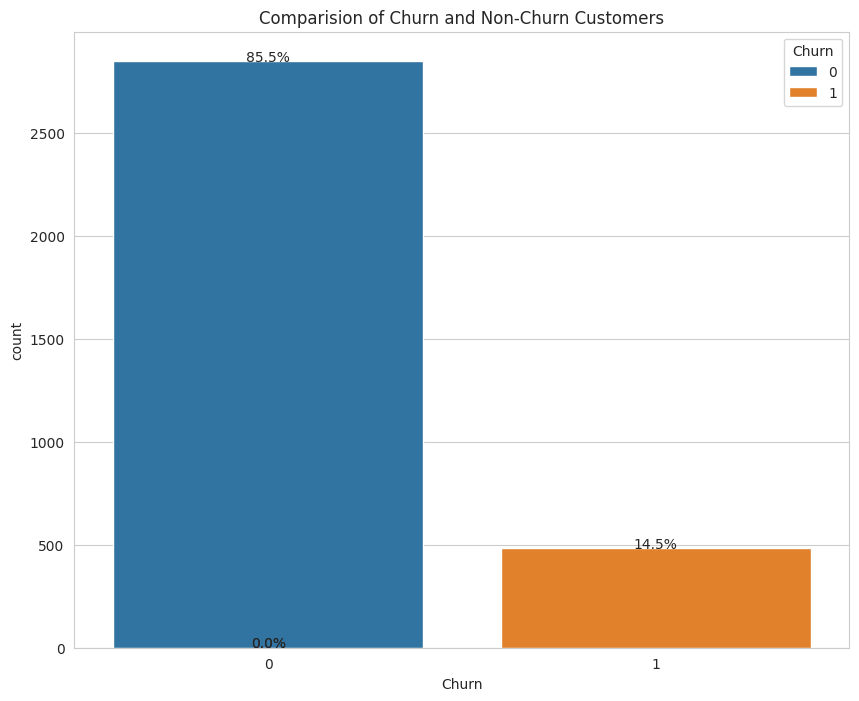

In [118]:
# Create a bar plot for the number and percentage of Churn vs Non-Churn customers
plt.figure(figsize = (10,8))
total = float(len(telecom_df))
ax = sns.countplot(x= 'Churn', data = telecom_df, hue = 'Churn')
plt.title('Comparision of Churn and Non-Churn Customers')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width()*0.5)
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

plt.show()